In [40]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Settings
sns.set_style("whitegrid")




In [41]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance_Final.csv to StudentsPerformance_Final (1).csv


In [42]:
df = pd.read_csv("StudentsPerformance_Final.csv")
df.head()


,gender,test preparation course,Maths_Score,science score,english score,StudyHoursPerDay,AttendanceRate,PreferredSubject
0,female,none,72,72,74,3.6,67.4,English
1,female,completed,69,90,88,7.7,81.7,English
2,female,none,90,95,93,6.1,94.9,English
3,male,none,47,57,44,5.2,89.3,Science
4,male,none,76,78,75,2.1,92.3,Science


In [46]:
print("Shape of Dataset:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)


Shape of Dataset: (1000, 7)

Column Names:
 Index(['gender', 'Maths_Score', 'science score', 'english score',
       'StudyHoursPerDay', 'AttendanceRate', 'PreferredSubject'],
      dtype='object')

Data Types:
 gender               object
Maths_Score           int64
science score         int64
english score         int64
StudyHoursPerDay    float64
AttendanceRate      float64
PreferredSubject     object
dtype: object


In [47]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print(df.columns)


Index(['gender', 'maths_score', 'science_score', 'english_score',
       'studyhoursperday', 'attendancerate', 'preferredsubject'],
      dtype='object')


Missing Values:

gender              0
maths_score         0
science_score       0
english_score       0
studyhoursperday    0
attendancerate      0
preferredsubject    0
dtype: int64


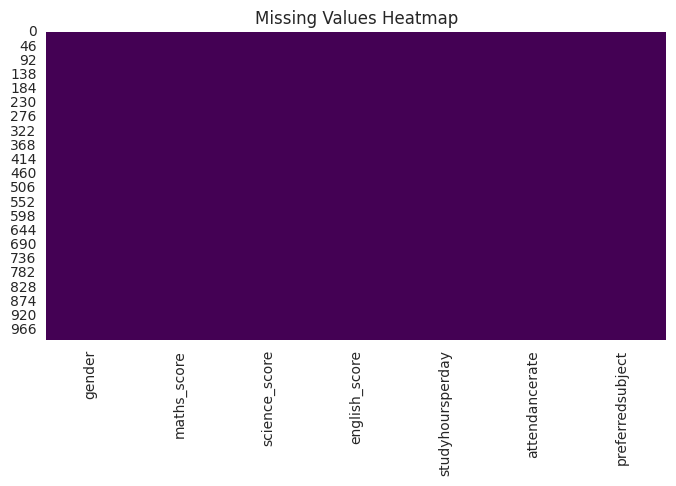

In [48]:
print("Missing Values:\n")
print(df.isnull().sum())

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [49]:
stats_cols = ['maths_score', 'science_score', 'english_score',
              'studyhoursperday', 'attendancerate']

desc_stats = df[stats_cols].agg(['mean', 'median'])
mode_stats = df[stats_cols].mode().iloc[0]

print("====== Mean and Median ======")
print(desc_stats)

print("\n====== Mode ======")
print(mode_stats)


====== Mean and Median ======
        maths_score  science_score  english_score  studyhoursperday  \
mean         66.089         69.169         68.054            4.4318   
median       66.000         70.000         69.000            4.5000   

        attendancerate  
mean           80.2803  
median         80.7500  

====== Mode ======
maths_score         65.0
science_score       72.0
english_score       74.0
studyhoursperday     7.3
attendancerate      94.7
Name: 0, dtype: float64


In [50]:
print("Skewness Values:\n")
print(df[stats_cols].skew())


Skewness Values:

maths_score        -0.278935
science_score      -0.259105
english_score      -0.289444
studyhoursperday    0.039442
attendancerate     -0.058994
dtype: float64


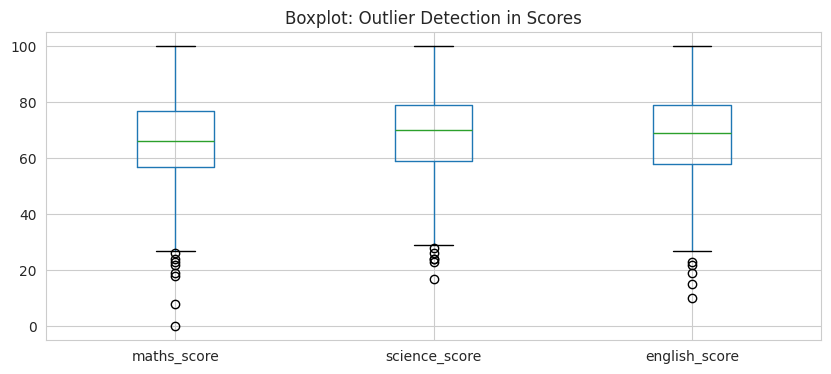

In [51]:
plt.figure(figsize=(10,4))
df[['maths_score', 'science_score', 'english_score']].boxplot()
plt.title("Boxplot: Outlier Detection in Scores")
plt.show()


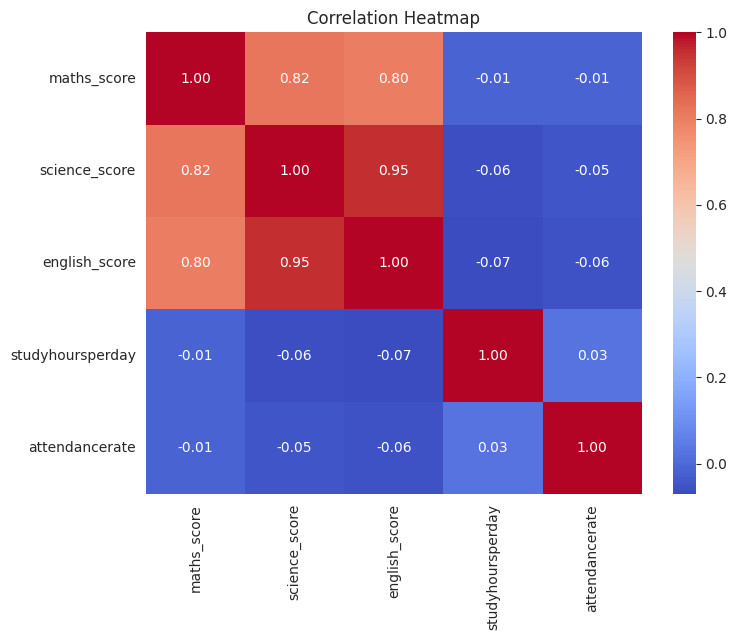

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df[stats_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [53]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standard = pd.DataFrame(
    scaler_standard.fit_transform(df[stats_cols]),
    columns=stats_cols
)

df_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(df[stats_cols]),
    columns=stats_cols
)

print("Standard Scaled:\n")
print(df_standard.head())

print("\nMinMax Scaled:\n")
print(df_minmax.head())


Standard Scaled:

   maths_score  science_score  english_score  studyhoursperday  attendancerate
0     0.390024       0.193999       0.391492         -0.407057       -1.102591
1     0.192076       1.427476       1.313269          1.599354        0.121530
2     1.577711       1.770109       1.642475          0.816364        1.251488
3    -1.259543      -0.833899      -1.583744          0.375933        0.772112
4     0.653954       0.605158       0.457333         -1.141109        1.028921

MinMax Scaled:

   maths_score  science_score  english_score  studyhoursperday  attendancerate
0         0.72       0.662651       0.711111          0.371429        0.182957
1         0.69       0.879518       0.866667          0.957143        0.541353
2         0.90       0.939759       0.922222          0.728571        0.872180
3         0.47       0.481928       0.377778          0.600000        0.731830
4         0.76       0.734940       0.722222          0.157143        0.807018


In [54]:
fig = px.scatter_3d(
    df,
    x='maths_score',
    y='science_score',
    z='english_score',
    color='gender'
)

fig.show()


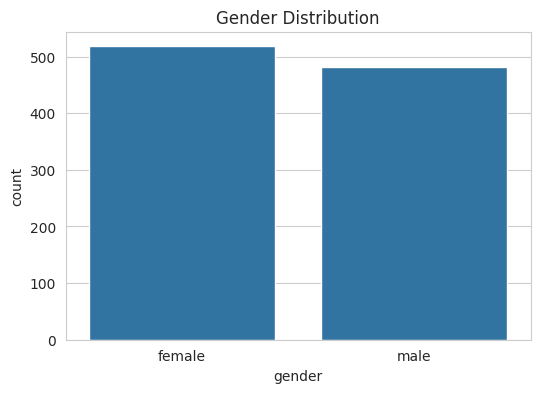

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()
